# Data Analysis - First Exploration and Features

## Cargando dataset y preparación inicial

In [6]:
df_timeseries_final

,Track Name,Artist,streams_song_day,date,spotify_id,year,month,week,day,year_month,streams_month,streams_year,streams_day,album,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,release_date_year,genres_together,artist_id,artist_followers,artist_popularity,genre_depurated_final
0,Tusa,KAROL G,344475.0,2020-01-01,7k4t7uLgtOxPwTpFmtJNTY,2020,1,1,1,2020-01-01,472515212.0,6.399289e+09,11238605.0,Tusa,2019-11-07,0.362231,0.905263,0.2950,0.803,0.715,0.000134,0.0574,0.871977,0.415621,0.574,0.476553,2019-01-01,"latin,reggaeton,reggaeton colombiano,trap latino",790FomKkXshlbRYZFtlgla,14621954,0.90,latin and reggaeton
1,Tusa,KAROL G,436442.0,2020-01-02,7k4t7uLgtOxPwTpFmtJNTY,2020,1,1,2,2020-01-01,472515212.0,6.399289e+09,14874893.0,Tusa,2019-11-07,0.362231,0.905263,0.2950,0.803,0.715,0.000134,0.0574,0.871977,0.415621,0.574,0.476553,2019-01-01,"latin,reggaeton,reggaeton colombiano,trap latino",790FomKkXshlbRYZFtlgla,14621954,0.90,latin and reggaeton
2,Tusa,KAROL G,447837.0,2020-01-03,7k4t7uLgtOxPwTpFmtJNTY,2020,1,1,3,2020-01-01,472515212.0,6.399289e+09,15369224.0,Tusa,2019-11-07,0.362231,0.905263,0.2950,0.803,0.715,0.000134,0.0574,0.871977,0.415621,0.574,0.476553,2019-01-01,"latin,reggaeton,reggaeton colombiano,trap latino",790FomKkXshlbRYZFtlgla,14621954,0.90,latin and reggaeton
3,Tusa,KAROL G,442161.0,2020-01-04,7k4t7uLgtOxPwTpFmtJNTY,2020,1,1,4,2020-01-01,472515212.0,6.399289e+09,14592459.0,Tusa,2019-11-07,0.362231,0.905263,0.2950,0.803,0.715,0.000134,0.0574,0.871977,0.415621,0.574,0.476553,2019-01-01,"latin,reggaeton,reggaeton colombiano,trap latino",790FomKkXshlbRYZFtlgla,14621954,0.90,latin and reggaeton
4,Tusa,KAROL G,419754.0,2020-01-05,7k4t7uLgtOxPwTpFmtJNTY,2020,1,1,5,2020-01-01,472515212.0,6.399289e+09,13511143.0,Tusa,2019-11-07,0.362231,0.905263,0.2950,0.803,0.715,0.000134,0.0574,0.871977,0.415621,0.574,0.476553,2019-01-01,"latin,reggaeton,reggaeton colombiano,trap latino",790FomKkXshlbRYZFtlgla,14621954,0.90,latin and reggaeton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285736,One More Sleep,Leona Lewis,26720.0,2017-12-24,78pn8k7RogKo2oxl0DyX6d,2017,12,51,24,2017-12-01,323234736.0,3.656169e+09,13012108.0,"Christmas, With Love",2013-12-02,0.447901,0.726316,0.4640,0.638,0.813,0.000000,0.3440,0.854105,0.050488,0.754,0.532659,2013-01-01,"british soul,dance pop,europop,pop,pop dance,p...",5lKZWd6HiSCLfnDGrq9RAm,2622267,0.73,"hip hop, r&b and soul"
285737,One More Sleep,Leona Lewis,15876.0,2017-12-25,78pn8k7RogKo2oxl0DyX6d,2017,12,52,25,2017-12-01,323234736.0,3.656169e+09,8216323.0,"Christmas, With Love",2013-12-02,0.447901,0.726316,0.4640,0.638,0.813,0.000000,0.3440,0.854105,0.050488,0.754,0.532659,2013-01-01,"british soul,dance pop,europop,pop,pop dance,p...",5lKZWd6HiSCLfnDGrq9RAm,2622267,0.73,"hip hop, r&b and soul"
285738,Ain't No Mountain High Enough,Marvin Gaye,31874.0,2017-12-31,2H3ZUSE54pST4ubRd5FzFR,2017,12,52,31,2017-12-01,323234736.0,3.656169e+09,13527896.0,United,1967-08-29,0.252901,0.000000,0.4820,0.669,0.616,0.000000,0.1790,0.636535,0.046025,0.818,0.613044,1967-01-01,"classic soul,funk,motown,northern soul,quiet s...",3koiLjNrgRTNbOwViDipeA,3813977,0.77,"hip hop, r&b and soul"
285739,Can't Hold Us - feat. Ray Dalton,Macklemore & Ryan Lewis,26632.0,2017-12-31,3bidbhpOYeV4knp8AIu8Xn,2017,12,52,31,2017-12-01,323234736.0,3.656169e+09,13527896.0,The Heist,2012-10-09,0.489500,0.852632,0.0291,0.641,0.922,0.000000,0.0862,0.835008,0.109623,0.847,0.688667,2012-01-01,"dance pop,pop,pop dance,pop rap,seattle hip hop",5BcAKTbp20cv7tC5VqPFoC,2551450,0.79,"dance, electro and ambient"


In [12]:
df_timeseries_final['streams_song_day'].sum()

20204427891.0

In [15]:
artist_unique = df_timeseries_final.groupby('Track Name')['streams_song_day'].sum()
print(artist_unique.shape)
artist_unique.sort_values(ascending=False).head(20)

(3733,)


Track Name
Tusa                                    107849883.0
China                                   101270222.0
Me Rehúso                                98255116.0
Contando Lunares (feat. Cruz Cafuné)     97293336.0
Shape of You                             84110103.0
Despacito (Featuring Daddy Yankee)       82993733.0
Con Calma                                81886464.0
Sin Pijama                               79591069.0
Calma - Remix                            78158369.0
Adan y Eva                               74601226.0
Vaina Loca                               72067041.0
Alocao (With Bad Gyal)                   72051349.0
Callaita                                 70606858.0
Con Altura                               69689499.0
Te Boté - Remix                          68444130.0
No Me Conoce - Remix                     65534232.0
Dance Monkey                             64515545.0
Se iluminaba                             63336740.0
Usted                                    63214717.0
F

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import altair as alt

# Configuración Jupyter
pd.set_option('display.max_columns', None)
sns.set_style("darkgrid")

# Cargamos el dataframe final de extracción, donde están todas las canciones
df_timeseries_final = pd.read_csv("data_allyear/data_ana_timeseries_final.csv", sep = ',', parse_dates=['date','year_month', 'release_date_year'])
print('Tamaño inicial: ', df_timeseries_final.shape)

df_timeseries_final_month = pd.read_csv("data_allyear/data_ana_timeseries_final.csv", sep = ',', parse_dates=['date','year_month', 'release_date_year'])
print('Tamaño inicial: ', df_timeseries_final.shape)

# Quitamos algunas columnas que no usaremos y sobran
df_timeseries_final = df_timeseries_final.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'name', 'time_signature','artist', 'genre1', 'genre2', 'genre3', 'genre4', 'genre5', 'genre6', 'genre7', 'genre6',
                                                    'genre7', 'genre8', 'genre9','genre10','10'])
df_timeseries_final_month = df_timeseries_final_month.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'name', 'time_signature','artist', 'genre1', 'genre2', 'genre3', 'genre4', 'genre5', 'genre6', 'genre7', 'genre6',
                                                    'genre7', 'genre8', 'genre9','genre10','10'])
print('Tamaño quitando columnas que sobran: ', df_timeseries_final.shape)
df_timeseries_final.head(5)

/Users/victormac/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (37,38,39,40,41,42) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Tamaño inicial:  (285741, 48)
Tamaño inicial:  (285741, 48)
Tamaño quitando columnas que sobran:  (285741, 32)


,Track Name,Artist,streams_song_day,date,spotify_id,year,month,week,day,year_month,streams_month,streams_year,streams_day,album,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,release_date_year,genres_together,artist_id,artist_followers,artist_popularity,genre_depurated_final
0,Tusa,KAROL G,344475.0,2020-01-01,7k4t7uLgtOxPwTpFmtJNTY,2020,1,1,1,2020-01-01,472515212.0,6.399289e+09,11238605.0,Tusa,2019-11-07,0.362231,0.905263,0.295,0.803,0.715,0.000134,0.0574,0.871977,0.415621,0.574,0.476553,2019-01-01,"latin,reggaeton,reggaeton colombiano,trap latino",790FomKkXshlbRYZFtlgla,14621954,0.9,latin and reggaeton
1,Tusa,KAROL G,436442.0,2020-01-02,7k4t7uLgtOxPwTpFmtJNTY,2020,1,1,2,2020-01-01,472515212.0,6.399289e+09,14874893.0,Tusa,2019-11-07,0.362231,0.905263,0.295,0.803,0.715,0.000134,0.0574,0.871977,0.415621,0.574,0.476553,2019-01-01,"latin,reggaeton,reggaeton colombiano,trap latino",790FomKkXshlbRYZFtlgla,14621954,0.9,latin and reggaeton
2,Tusa,KAROL G,447837.0,2020-01-03,7k4t7uLgtOxPwTpFmtJNTY,2020,1,1,3,2020-01-01,472515212.0,6.399289e+09,15369224.0,Tusa,2019-11-07,0.362231,0.905263,0.295,0.803,0.715,0.000134,0.0574,0.871977,0.415621,0.574,0.476553,2019-01-01,"latin,reggaeton,reggaeton colombiano,trap latino",790FomKkXshlbRYZFtlgla,14621954,0.9,latin and reggaeton
3,Tusa,KAROL G,442161.0,2020-01-04,7k4t7uLgtOxPwTpFmtJNTY,2020,1,1,4,2020-01-01,472515212.0,6.399289e+09,14592459.0,Tusa,2019-11-07,0.362231,0.905263,0.295,0.803,0.715,0.000134,0.0574,0.871977,0.415621,0.574,0.476553,2019-01-01,"latin,reggaeton,reggaeton colombiano,trap latino",790FomKkXshlbRYZFtlgla,14621954,0.9,latin and reggaeton
4,Tusa,KAROL G,419754.0,2020-01-05,7k4t7uLgtOxPwTpFmtJNTY,2020,1,1,5,2020-01-01,472515212.0,6.399289e+09,13511143.0,Tusa,2019-11-07,0.362231,0.905263,0.295,0.803,0.715,0.000134,0.0574,0.871977,0.415621,0.574,0.476553,2019-01-01,"latin,reggaeton,reggaeton colombiano,trap latino",790FomKkXshlbRYZFtlgla,14621954,0.9,latin and reggaeton


## Ponderar por día

In [28]:
# Calculamos los pesos de cada canción respecto al total del día
df_timeseries_final['streamstotal_weights_day'] = df_timeseries_final['streams_song_day']/df_timeseries_final['streams_day']
print ('Suma de pesos de streams del día(debería salir 1):', df_timeseries_final[df_timeseries_final.date == '2020-07-04']['streamstotal_weights_day'].sum())
df_timeseries_final[df_timeseries_final.date == '2020-07-04'].sort_values(by=['streams_song_day'], ascending=False)

Suma de pesos de streams del día(debería salir 1): 0.9924091491244612


,Track Name,Artist,streams_song_day,date,spotify_id,year,month,week,day,year_month,streams_month,streams_year,streams_day,album,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,release_date_year,genres_together,artist_id,artist_followers,artist_popularity,genre_depurated_final,streamstotal_weights_day
52100,Caramelo,Ozuna,509771.0,2020-07-04,3gD4J3RUHy4OUuZ3qAiaiG,2020,7,27,4,2020-07-01,581453230.0,6.399289e+09,19758918.0,Caramelo,2020-06-11,0.399018,0.852632,0.05310,0.728,0.806,0.000301,0.1530,0.856712,0.086890,0.698,0.792412,2020-01-01,"latin,puerto rican pop,reggaeton,trap latino",1i8SpTcr7yvPOmcqrbnVXY,26568238,0.94,latin and reggaeton,0.025800
203333,La Jeepeta - Remix,Nio Garcia,480511.0,2020-07-04,1mohfLaTJtB2RplHLQVM70,2020,7,27,4,2020-07-01,581453230.0,6.399289e+09,19758918.0,La Jeepeta (Remix),2020-04-24,0.682234,0.863158,0.30000,0.815,0.715,0.000005,0.0910,0.828947,0.288703,0.786,0.829764,2020-01-01,"latin,reggaeton,trap latino,tropical",5hdhHgpxyniooUiQVaPxQ0,1566476,0.82,latin and reggaeton,0.024319
6580,El Manual,Anuel AA,436512.0,2020-07-04,7kOf0qHO4Rcwk6QJifZDRJ,2020,7,27,4,2020-07-01,581453230.0,6.399289e+09,19758918.0,Emmanuel,2020-05-29,0.383663,0.747368,0.35000,0.843,0.845,0.001680,0.0527,0.901376,0.070153,0.898,0.598674,2020-01-01,"latin,reggaeton,reggaeton flow,trap boricua,tr...",2R21vXR83lH98kGeO99Y66,16155909,0.93,latin and reggaeton,0.022092
213843,Carita de Inocente (feat. Myke Towers) - Remix,Prince Royce,385170.0,2020-07-04,5kQre7o8ky5DXeEPcyaCR1,2020,7,27,4,2020-07-01,581453230.0,6.399289e+09,19758918.0,Carita de Inocente (feat. Myke Towers) [Remix],2020-06-01,0.343907,0.778947,0.36400,0.565,0.781,0.000000,0.0984,0.869527,0.085077,0.943,0.612676,2020-01-01,"bachata,latin,latin pop,trap latino,tropical",3MHaV05u0io8fQbZ2XPtlC,5976443,0.81,latin and reggaeton,0.019493
5616,Hasta Que Dios Diga,Anuel AA,373341.0,2020-07-04,06s3QtMJVXw1AJX3UfvZG1,2020,7,27,4,2020-07-01,581453230.0,6.399289e+09,19758918.0,Emmanuel,2020-05-29,0.462127,0.842105,0.46400,0.691,0.765,0.000003,0.2030,0.826528,0.154812,0.855,0.820401,2020-01-01,"latin,reggaeton,reggaeton flow,trap boricua,tr...",2R21vXR83lH98kGeO99Y66,16155909,0.93,latin and reggaeton,0.018895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216554,Volveré a Empezar,Stay Homas,37842.0,2020-07-04,2KDNePHNaahkf8okcATp51,2020,7,27,4,2020-07-01,581453230.0,6.399289e+09,19758918.0,Volveré a Empezar,2020-07-03,0.244770,0.600000,0.05180,0.776,0.566,0.000000,0.0867,0.739431,0.078522,0.884,0.603087,2020-01-01,musica catalana,7fUEi9sgiLw8gwQ307T6IU,63675,0.61,other,0.001915
88065,Memories,Maroon 5,37800.0,2020-07-04,2b8fOow8UzyDFAE27YhOZM,2020,7,27,4,2020-07-01,581453230.0,6.399289e+09,19758918.0,Memories,2019-09-20,0.336783,0.905263,0.83700,0.764,0.320,0.000000,0.0822,0.748571,0.076151,0.575,0.429098,2019-01-01,"pop,pop rock",04gDigrS5kc9YWfZHwBETP,29157179,0.89,"pop, new age and standards",0.001913
52164,Mi Niña,Ozuna,37738.0,2020-07-04,2UO9EmjBqFD6cxzlsv6z2v,2020,7,27,4,2020-07-01,581453230.0,6.399289e+09,19758918.0,Mi Niña,2020-06-18,0.381896,0.673684,0.18000,0.679,0.706,0.000000,0.0784,0.822571,0.116597,0.543,0.801666,2020-01-01,"latin,puerto rican pop,reggaeton,trap latino",1i8SpTcr7yvPOmcqrbnVXY,26568238,0.94,latin and reggaeton,0.001910
73770,Tabú,Pablo Alborán,37689.0,2020-07-04,471HeGJPKw07MObixON0Um,2020,7,27,4,2020-07-01,581453230.0,6.399289e+09,19758918.0,Tabú,2019-11-06,0.315242,0.694737,0.03660,0.748,0.808,0.000037,0.1100,0.788335,0.086332,0.553,0.471424,2019-01-01,"latin,latin arena pop,latin pop,spanish pop",5M9Bb4adKAgrOFOhc05Y50,3516979,0.79,latin and reggaeton,0.001907


In [29]:
# Y ahora calculamos la media de cada feature teniendo en cuenta dichos pesos
# Función de calculo:
def mediapon_features (feature, dataframe):
    media_compar = dataframe.loc[:, ['Track Name','date', feature, 'streamstotal_weights_day']]
    media_compar["feature_media_day"] = media_compar[feature] * media_compar['streamstotal_weights_day']
    media_compar = media_compar.groupby(['date']).sum()
    media_compar.reset_index(inplace=True)
    media_compar = media_compar.drop(columns=[feature, 'streamstotal_weights_day'])
    media_compar["features"] = feature  
    return media_compar

media_lenght = mediapon_features('length', df_timeseries_final)
media_popularity = mediapon_features('popularity', df_timeseries_final)
media_acousticness = mediapon_features('acousticness', df_timeseries_final)
media_danceability = mediapon_features('danceability', df_timeseries_final)
media_energy = mediapon_features('energy', df_timeseries_final)
media_instrumentalness = mediapon_features('instrumentalness', df_timeseries_final)
media_liveness = mediapon_features('liveness', df_timeseries_final)
media_speechiness = mediapon_features('speechiness', df_timeseries_final)
media_valence = mediapon_features('valence', df_timeseries_final)
media_loudness = mediapon_features('loudness', df_timeseries_final)
media_tempo = mediapon_features('tempo', df_timeseries_final)

# Juntamos todos los dataframes de features
df_timeseries_final_features = pd.concat([
           media_lenght,
           media_popularity,
           media_acousticness,
           media_danceability,
           media_energy,
           media_instrumentalness,
           media_liveness,
           media_speechiness,
           media_valence,
           media_loudness,
           media_tempo,
          ], axis=0)

df_timeseries_final_features

# Exportamos tabla
df_timeseries_final_features.to_csv("data_allyear/data_ana_timeseries_final_toprophet_BYDAY.csv", sep = ',')
df_timeseries_final_features

,date,feature_media_day,features
0,2017-01-01,0.401490,length
1,2017-01-02,0.403584,length
2,2017-01-03,0.403077,length
3,2017-01-04,0.403753,length
4,2017-01-05,0.402554,length
...,...,...,...
1449,2020-12-24,0.577075,tempo
1450,2020-12-25,0.579101,tempo
1451,2020-12-26,0.577114,tempo
1452,2020-12-27,0.571161,tempo


## Ponderar por mes

In [30]:
df_timeseries_final_addmonthsongsstreams = df_timeseries_final_month.groupby(['year_month','spotify_id'])['streams_song_day'].sum().to_frame().rename(columns={
    'spotify_id':'spotify_id', 'year_month':'year_month', 'streams_song_day': 'streams_song_month'}).reset_index()
df_timeseries_final_addmonthsongsstreams[df_timeseries_final_addmonthsongsstreams['spotify_id'] == '0OGwGIp2WLU3jOC2xRq3id']

,year_month,spotify_id,streams_song_month
9488,2019-06-01,0OGwGIp2WLU3jOC2xRq3id,875676.0
9811,2019-07-01,0OGwGIp2WLU3jOC2xRq3id,1356875.0
10099,2019-08-01,0OGwGIp2WLU3jOC2xRq3id,1020087.0
10383,2019-09-01,0OGwGIp2WLU3jOC2xRq3id,1163368.0
10669,2019-10-01,0OGwGIp2WLU3jOC2xRq3id,1134817.0
11001,2019-11-01,0OGwGIp2WLU3jOC2xRq3id,761563.0
11294,2019-12-01,0OGwGIp2WLU3jOC2xRq3id,344936.0
12266,2020-03-01,0OGwGIp2WLU3jOC2xRq3id,32503.0


In [31]:
# Añadimos los streams de cada canción en el mes porque faltaban
df_timeseries_final_month = pd.merge(df_timeseries_final_month, df_timeseries_final_addmonthsongsstreams, on=['spotify_id', 'year_month'], how='inner')
df_timeseries_final_month.shape

(285741, 33)

In [32]:
# IMPOTANTE, UN ERROR QUE TUVE: HAY QUE QUITAR DUPLCIADOS ANTES!!!!!!! PRUEBA: 
prueba_x = df_timeseries_final_month[df_timeseries_final_month['year_month'] == '2019-03-01']
prueba_x.sort_values(by='streams_song_month', ascending=False)

,Track Name,Artist,streams_song_day,date,spotify_id,year,month,week,day,year_month,streams_month,streams_year,streams_day,album,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,release_date_year,genres_together,artist_id,artist_followers,artist_popularity,genre_depurated_final,streams_song_month
68911,Contando Lunares (feat. Cruz Cafuné),Don Patricio,527124.0,2019-03-16,6Cs7b9bu3fy5XhMwBA9Tz4,2019,3,11,16,2019-03-01,468644315.0,5.715834e+09,16400573.0,La Dura Vida del Joven Rapero,2019-01-27,0.403720,0.000000,0.44400,0.856,0.523,0.000000,0.0537,0.645801,0.182706,0.709,0.499418,2019-01-01,"trap latino,urbano espanol",6vPXtLmNd3mW0dd1Rb9eQ9,462583,0.67,latin and reggaeton,14551986.0
68925,Contando Lunares (feat. Cruz Cafuné),Don Patricio,567957.0,2019-03-30,6Cs7b9bu3fy5XhMwBA9Tz4,2019,3,13,30,2019-03-01,468644315.0,5.715834e+09,17578686.0,La Dura Vida del Joven Rapero,2019-01-27,0.403720,0.000000,0.44400,0.856,0.523,0.000000,0.0537,0.645801,0.182706,0.709,0.499418,2019-01-01,"trap latino,urbano espanol",6vPXtLmNd3mW0dd1Rb9eQ9,462583,0.67,latin and reggaeton,14551986.0
68924,Contando Lunares (feat. Cruz Cafuné),Don Patricio,540136.0,2019-03-29,6Cs7b9bu3fy5XhMwBA9Tz4,2019,3,13,29,2019-03-01,468644315.0,5.715834e+09,17749973.0,La Dura Vida del Joven Rapero,2019-01-27,0.403720,0.000000,0.44400,0.856,0.523,0.000000,0.0537,0.645801,0.182706,0.709,0.499418,2019-01-01,"trap latino,urbano espanol",6vPXtLmNd3mW0dd1Rb9eQ9,462583,0.67,latin and reggaeton,14551986.0
68923,Contando Lunares (feat. Cruz Cafuné),Don Patricio,486462.0,2019-03-28,6Cs7b9bu3fy5XhMwBA9Tz4,2019,3,13,28,2019-03-01,468644315.0,5.715834e+09,15511448.0,La Dura Vida del Joven Rapero,2019-01-27,0.403720,0.000000,0.44400,0.856,0.523,0.000000,0.0537,0.645801,0.182706,0.709,0.499418,2019-01-01,"trap latino,urbano espanol",6vPXtLmNd3mW0dd1Rb9eQ9,462583,0.67,latin and reggaeton,14551986.0
68922,Contando Lunares (feat. Cruz Cafuné),Don Patricio,462225.0,2019-03-27,6Cs7b9bu3fy5XhMwBA9Tz4,2019,3,13,27,2019-03-01,468644315.0,5.715834e+09,15005184.0,La Dura Vida del Joven Rapero,2019-01-27,0.403720,0.000000,0.44400,0.856,0.523,0.000000,0.0537,0.645801,0.182706,0.709,0.499418,2019-01-01,"trap latino,urbano espanol",6vPXtLmNd3mW0dd1Rb9eQ9,462583,0.67,latin and reggaeton,14551986.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184213,Sirena,Cali Y El Dandee,28657.0,2019-03-02,1juHIWqgFiDFAKuEBP24Lt,2019,3,9,2,2019-03-01,468644315.0,5.715834e+09,16453619.0,Sirena,2018-04-27,0.372946,0.610526,0.00472,0.765,0.767,0.000009,0.0618,0.834977,0.071130,0.319,0.442902,2018-01-01,"champeta,colombian pop,electro latino,latin,la...",5DUlefCLzVRzNWaNURTFpK,2857357,0.79,latin and reggaeton,28657.0
7793,Brindemos,Anuel AA,28465.0,2019-03-02,7LeQ55Z5jPBB0ggYJtAiYO,2019,3,9,2,2019-03-01,468644315.0,5.715834e+09,16453619.0,Real Hasta la Muerte,2018-07-17,0.397490,0.000000,0.30800,0.812,0.660,0.000000,0.0617,0.869684,0.119107,0.358,0.660239,2018-01-01,"latin,reggaeton,reggaeton flow,trap boricua,tr...",2R21vXR83lH98kGeO99Y66,16155909,0.93,latin and reggaeton,28465.0
94307,idontwannabeyouanymore,Billie Eilish,26918.0,2019-03-10,40T5GIqQ1CegGm2PTEl8Bu,2019,3,10,10,2019-03-01,468644315.0,5.715834e+09,13349951.0,dont smile at me (Expanded Edition),2017-08-11,0.368018,0.515789,0.73700,0.483,0.412,0.000000,0.1160,0.709247,0.056067,0.247,0.802213,2017-01-01,"electropop,pop",6qqNVTkY8uBg9cP3Jd7DAH,38901683,0.93,"dance, electro and ambient",26918.0
260129,"Tumbando el Club (feat. C.R.O, Obiewanshot, Ys...",Neo Pistea,26371.0,2019-03-31,0OWcpVA83HI8Pb5DybDuoX,2019,3,13,31,2019-03-01,468644315.0,5.715834e+09,13763499.0,"Tumbando el Club (feat. C.R.O, Obiewanshot, Ys...",2019-03-27,0.929973,0.673684,0.35400,0.882,0.777,0.000000,0.1350,0.835385,0.070293,0.533,0.575084,2019-01-01,"argentine hip hop,trap argentino,trap latino",01m2XZ7m7rAz6KY3scTdaV,720031,0

In [33]:
#Quitamos duplicaciones de canciones (ojo, en meses!!) porque con una fila nos vale.
df_timeseries_final_month = df_timeseries_final_month.drop_duplicates(subset=['year_month', 'spotify_id'], keep='last').copy()
print('Tamaño sin duplicados de canciones: ', df_timeseries_final_month.shape)

# Calculamos los pesos de cada canción respecto al total del mes
df_timeseries_final_month['streamstotal_weights_month'] = df_timeseries_final_month['streams_song_month']/df_timeseries_final_month['streams_month']
print ('Suma de pesos de streams del mes(debería salir 1):', df_timeseries_final_month[df_timeseries_final_month.year_month == '2019-02-01']['streamstotal_weights_month'].sum())

# Miro a ver como está el percal
df_timeseries_final_month[df_timeseries_final_month == '2019-03-01'].head()
# df_timeseries_final_month[df_timeseries_final_month['Track Name'] == 'Tusa']

df_timeseries_final_month

Tamaño sin duplicados de canciones:  (15387, 33)
Suma de pesos de streams del mes(debería salir 1): 0.9971063680544612


/Users/victormac/opt/anaconda3/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,Track Name,Artist,streams_song_day,date,spotify_id,year,month,week,day,year_month,streams_month,streams_year,streams_day,album,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,release_date_year,genres_together,artist_id,artist_followers,artist_popularity,genre_depurated_final,streams_song_month,streamstotal_weights_month
30,Tusa,KAROL G,652627.0,2020-01-31,7k4t7uLgtOxPwTpFmtJNTY,2020,1,5,31,2020-01-01,472515212.0,6.399289e+09,17619259.0,Tusa,2019-11-07,0.362231,0.905263,0.2950,0.803,0.715,0.000134,0.0574,0.871977,0.415621,0.574,0.476553,2019-01-01,"latin,reggaeton,reggaeton colombiano,trap latino",790FomKkXshlbRYZFtlgla,14621954,0.90,latin and reggaeton,15828462.0,0.033498
59,Tusa,KAROL G,607671.0,2020-02-29,7k4t7uLgtOxPwTpFmtJNTY,2020,2,9,29,2020-02-01,479921131.0,6.399289e+09,21210432.0,Tusa,2019-11-07,0.362231,0.905263,0.2950,0.803,0.715,0.000134,0.0574,0.871977,0.415621,0.574,0.476553,2019-01-01,"latin,reggaeton,reggaeton colombiano,trap latino",790FomKkXshlbRYZFtlgla,14621954,0.90,latin and reggaeton,15990145.0,0.033318
90,Tusa,KAROL G,325492.0,2020-03-31,7k4t7uLgtOxPwTpFmtJNTY,2020,3,14,31,2020-03-01,531701065.0,6.399289e+09,15488621.0,Tusa,2019-11-07,0.362231,0.905263,0.2950,0.803,0.715,0.000134,0.0574,0.871977,0.415621,0.574,0.476553,2019-01-01,"latin,reggaeton,reggaeton colombiano,trap latino",790FomKkXshlbRYZFtlgla,14621954,0.90,latin and reggaeton,13555924.0,0.025495
120,Tusa,KAROL G,225635.0,2020-04-30,7k4t7uLgtOxPwTpFmtJNTY,2020,4,18,30,2020-04-01,468617849.0,6.399289e+09,15536358.0,Tusa,2019-11-07,0.362231,0.905263,0.2950,0.803,0.715,0.000134,0.0574,0.871977,0.415621,0.574,0.476553,2019-01-01,"latin,reggaeton,reggaeton colombiano,trap latino",790FomKkXshlbRYZFtlgla,14621954,0.90,latin and reggaeton,8396158.0,0.017917
151,Tusa,KAROL G,176642.0,2020-05-31,7k4t7uLgtOxPwTpFmtJNTY,2020,5,22,31,2020-05-01,544514595.0,6.399289e+09,16327848.0,Tusa,2019-11-07,0.362231,0.905263,0.2950,0.803,0.715,0.000134,0.0574,0.871977,0.415621,0.574,0.476553,2019-01-01,"latin,reggaeton,reggaeton colombiano,trap latino",790FomKkXshlbRYZFtlgla,14621954,0.90,latin and reggaeton,6661579.0,0.012234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285735,"Merry Christmas, Happy Holidays",*NSYNC,27258.0,2017-12-24,15coTBAzEN1bOeipoNDZAR,2017,12,51,24,2017-12-01,323234736.0,3.656169e+09,13012108.0,Home For Christmas,1998-10-23,0.482767,0.621053,0.1040,0.643,0.939,0.000000,0.8810,0.850399,0.064575,0.756,0.495005,1998-01-01,"boy band,dance pop,europop,pop",6Ff53KvcvAj5U7Z1vojB5o,1421773,0.73,"pop, new age and standards",27258.0,0.000084
285737,One More Sleep,Leona Lewis,15876.0,2017-12-25,78pn8k7RogKo2oxl0DyX6d,2017,12,52,25,2017-12-01,323234736.0,3.656169e+09,8216323.0,"Christmas, With Love",2013-12-02,0.447901,0.726316,0.4640,0.638,0.813,0.000000,0.3440,0.854105,0.050488,0.754,0.532659,2013-01-01,"british soul,dance pop,europop,pop,pop dance,p...",5lKZWd6HiSCLfnDGrq9RAm,2622267,0.73,"hip hop, r&b and soul",42596.0,0.000132
285738,Ain't No Mountain High Enough,Marvin Gaye,31874.0,2017-12-31,2H3ZUSE54pST4ubRd5FzFR,2017,12,52,31,2017-12-01,323234736.0,3.656169e+09,13527896.0,United,1967-08-29,0.252901,0.000000,0.4820,0.669,0.616,0.000000,0.1790,0.636535,0.046025,0.818,0.613044,1967-01-01,"classic soul,funk,motown,northern soul,quiet s...",3koiLjNrgRTNbOwViDipeA,3813977,0.77,"hip hop, r&b and soul",31874.0,0.000099
285739,Can't Hold Us - feat. Ray Dalton,Macklemore & Ryan Lewis,26632.0,2017-12-31,3bidbhpOYeV4knp8AIu8Xn,2017,12,52,31,2017-12-01,323234736.0,3.656169e+09,13527896.0,The Heist,2012-10-09,0.489500,0.852632,0.0291,0.641,0.922,0.000000,0.0862,0.835008,0.109623,0.847,0.688667,2012-01-01,"dance pop,pop,pop dance,pop rap,seattle hip hop",5BcAKTbp20cv7tC5VqPFoC,2551450,0.79,"dance, electro and ambient",26632.0,0.000082


In [34]:
# Y ahora calculamos la media de cada feature teniendo en cuenta dichos pesos POR MES

dataframe_extraction = df_timeseries_final_month

# Función de calculo:
def mediapon_features (feature, dataframe):
    media_compar = dataframe.loc[:, ['year_month', feature, 'streamstotal_weights_month']]
    media_compar["feature_media_month"] = media_compar[feature] * media_compar['streamstotal_weights_month']
    media_compar = media_compar.groupby(['year_month']).sum()
    media_compar.reset_index(inplace=True)
    media_compar = media_compar.drop(columns=[feature, 'streamstotal_weights_month'])
    media_compar["features"] = feature  
    return media_compar

media_lenght = mediapon_features('length', dataframe_extraction)
media_popularity = mediapon_features('popularity', dataframe_extraction)
media_acousticness = mediapon_features('acousticness', dataframe_extraction)
media_danceability = mediapon_features('danceability', dataframe_extraction)
media_energy = mediapon_features('energy', dataframe_extraction)
media_instrumentalness = mediapon_features('instrumentalness', dataframe_extraction)
media_liveness = mediapon_features('liveness', dataframe_extraction)
media_speechiness = mediapon_features('speechiness', dataframe_extraction)
media_valence = mediapon_features('valence', dataframe_extraction)
media_loudness = mediapon_features('loudness', dataframe_extraction)
media_tempo = mediapon_features('tempo', dataframe_extraction)

# Juntamos todos los dataframes de features
df_timeseries_final_features_month = pd.concat([
           media_lenght,
           media_popularity,
           media_acousticness,
           media_danceability,
           media_energy,
           media_instrumentalness,
           media_liveness,
           media_speechiness,
           media_valence,
           media_loudness,
           media_tempo,
          ], axis=0)

# Exportamos tabla
df_timeseries_final_features_month.to_csv("data_allyear/data_ana_timeseries_final_toprophet_BYMONTH.csv", sep = ',')
df_timeseries_final_features_month[df_timeseries_final_features_month['features'] == 'length']

,year_month,feature_media_month,features
0,2017-01-01,0.405566,length
1,2017-02-01,0.408166,length
2,2017-03-01,0.408072,length
3,2017-04-01,0.407296,length
4,2017-05-01,0.408821,length
5,2017-06-01,0.407404,length
6,2017-07-01,0.401947,length
7,2017-08-01,0.399427,length
8,2017-09-01,0.396867,length
9,2017-10-01,0.395670,length


In [35]:
# Instalamos el paquete de Prophets
# !pip install pystan
# !pip install fbprophet

## PROPHETS

### Por día

In [36]:
# Cargamos archivo
df_timeseries_prophet = pd.read_csv("data_allyear/data_ana_timeseries_final_toprophet_BYDAY.csv", sep = ',', parse_dates=['date'])
print('Tamaño inicial: ', df_timeseries_prophet.shape)

# Quitamos el 2020, porque es lo que queremos que prediga
df_timeseries_prophet_no2020 = df_timeseries_prophet[(df_timeseries_prophet['date'].dt.year != 2020)]
df_timeseries_prophet_2020 = df_timeseries_prophet[(df_timeseries_prophet['date'].dt.year == 2020)]

Tamaño inicial:  (15994, 4)


In [37]:
#DANCEABILITY

# Cogemos solo de las features que queremos
dfpro_danceability_no2020 = df_timeseries_prophet_no2020[df_timeseries_prophet_no2020['features'] == 'danceability']
dfpro_danceability_2020 = df_timeseries_prophet_2020[df_timeseries_prophet_2020['features'] == 'danceability']
dfpro_danceability_all = df_timeseries_prophet[df_timeseries_prophet['features'] == 'danceability']

# Preparamos
dfpro_danceability_no2020 = dfpro_danceability_no2020.drop(columns=['Unnamed: 0', 'features']).rename(columns = {'feature_media_day': 'y', 'date': 'ds'}, inplace = False).reset_index()
print(dfpro_danceability_no2020.dtypes)
dfpro_danceability_2020 = dfpro_danceability_2020.reset_index().drop(columns=['Unnamed: 0', 'features', 'index']).rename(columns = {'feature_media_day': 'y', 'date': 'ds'}, inplace = False)
print(dfpro_danceability_2020.dtypes)
dfpro_danceability_all = dfpro_danceability_all.reset_index().drop(columns=['Unnamed: 0', 'features', 'index']).rename(columns = {'feature_media_day': 'y', 'date': 'ds'}, inplace = False)
print(dfpro_danceability_all.dtypes)

dfpro_danceability_no2020


index             int64
ds       datetime64[ns]
y               float64
dtype: object
ds    datetime64[ns]
y            float64
dtype: object
ds    datetime64[ns]
y            float64
dtype: object


,index,ds,y
0,4362,2017-01-01,0.697227
1,4363,2017-01-02,0.694642
2,4364,2017-01-03,0.693452
3,4365,2017-01-04,0.692009
4,4366,2017-01-05,0.692735
...,...,...,...
1086,5448,2019-12-27,0.725812
1087,5449,2019-12-28,0.730456
1088,5450,2019-12-29,0.729478
1089,5451,2019-12-30,0.728965


In [38]:
# Probamos el Prophet forecasting
from fbprophet import Prophet

# Entrenamos modelo
m = Prophet()
m.fit(dfpro_danceability_no2020)

# Hacemos las predicciones para el 2020
future = m.make_future_dataframe(periods=365)

# Hacemos el forecast completo
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
1451,2020-12-26,0.748996,0.580098,0.932398
1452,2020-12-27,0.746045,0.576732,0.927894
1453,2020-12-28,0.744134,0.570468,0.926691
1454,2020-12-29,0.744606,0.572477,0.926886
1455,2020-12-30,0.745701,0.573215,0.928711


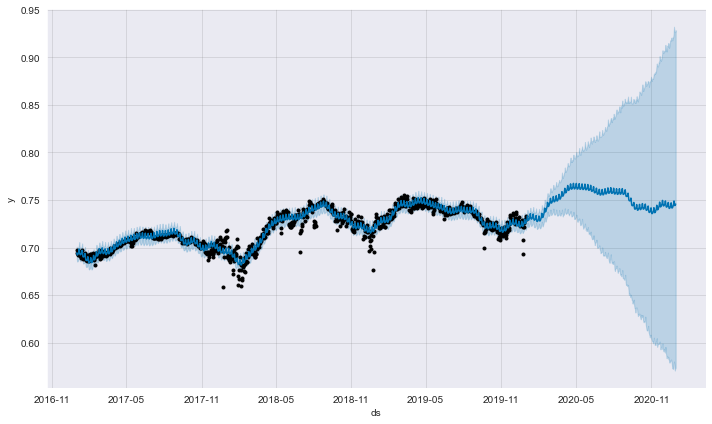

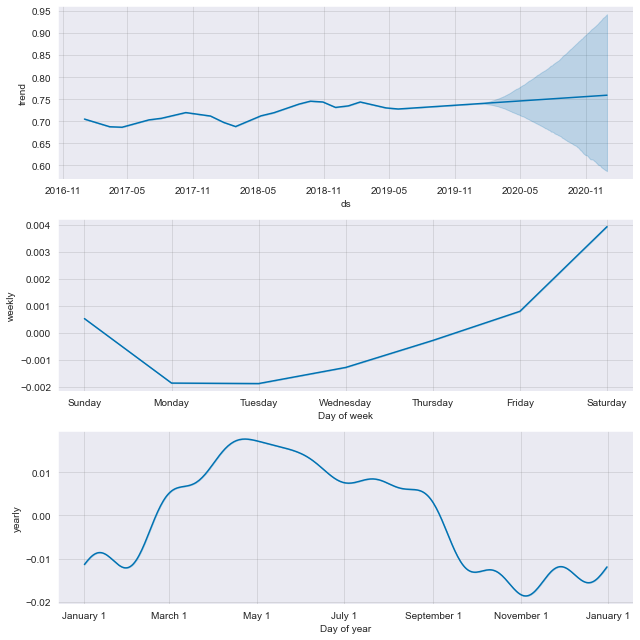

In [39]:
# Ploteamos 
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)

## ¿Cómo extraer los datos de los gráfiso de weekly y yearly

In [14]:
from fbprophet.plot import plot_cross_validation_metric, plot_components, plot_forecast_component, plot_seasonality, plot_weekly, plot_yearly,seasonality_plot_df

def Decomposition(m,name):
    # name = name of the seasonality component you want (yearly,monthly,etc...)
    # m = the model object
    # will return two arrays: one with the datetime values for the plot and one with the actual values
    start = pd.to_datetime('2016-01-01 0000')
    period = m.seasonalities[name]['period']
    end = start + pd.Timedelta(days=period)
    plot_points = 12
    days = pd.to_datetime(np.linspace(start.value, end.value, plot_points))
    df_y = seasonality_plot_df(m, days)
    seas = m.predict_seasonal_components(df_y)
    
    return(df_y['ds'].dt.to_pydatetime(),seas[name].values)

prueba2 = Decomposition(m,'yearly')
prueba2 = pd.DataFrame(prueba2)
prueba2 = prueba2.transpose()
prueba2[1] = prueba2[1].astype(str).astype(float)
prueba2


,0,1
0,2016-01-01 00:00:00.000000,-0.011713
1,2016-02-03 04:54:32.727272,-0.011728
2,2016-03-07 09:49:05.454545,0.006489
3,2016-04-09 14:43:38.181818,0.015780
4,2016-05-12 19:38:10.909090,0.016266
5,2016-06-15 00:32:43.636363,0.011043
6,2016-07-18 05:27:16.363636,0.008443
7,2016-08-20 10:21:49.090909,0.005915
8,2016-09-22 15:16:21.818181,-0.011986
9,2016-10-25 20:10:54.545454,-0.016627


In [15]:
#Hacemos una nueva gráfico y metemos los datos reales
# Comparamos con datos reales

# dfpro_danceability_all.set_index('ds', inplace=True)
# dfpro_danceability_all.index = pd.to_datetime(dfpro_danceability_all.index)

forecast_pandemia = forecast[(forecast['ds'] > '2019-09-01') & (forecast['ds'] < '2020-07-01')]

plt.figure(figsize=(40, 20))
plt.plot(dfpro_danceability_all, 'g-')
plt.plot(forecast['ds'], forecast['yhat'], 'b-')
plt.plot(forecast['ds'], forecast['yhat_lower'], 'y-')
plt.plot(forecast['ds'], forecast['yhat_upper'], 'y-')
plt.plot(forecast_pandemia['ds'], forecast_pandemia['trend'], 'r-')
plt.legend(['Datos reales', 'Forecast', 'Lower Forecast', 'Upper Forecast', 'Trend'])
plt.xlabel('Date')
plt.ylabel('Danceability')
plt.title('XXXX');
plt.show()

ValueError: view limit minimum -36889.450000000004 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 2880x1440 with 1 Axes>

In [16]:
forecast_pandemia = forecast[(forecast['ds'] > '2020-01-01') & (forecast['ds'] < '2020-12-01')]

#dfpro_danceability_2020.set_index('ds', inplace=True)
#dfpro_danceability_2020.index = pd.to_datetime(dfpro_danceability_2020.index)
                             
plt.figure(figsize=(40, 20))
plt.plot(dfpro_danceability_2020, 'g-')
plt.plot(forecast_pandemia['ds'], forecast_pandemia['yhat'], 'b-')
plt.plot(forecast_pandemia['ds'], forecast_pandemia['yhat_lower'], 'y-')
plt.plot(forecast_pandemia['ds'], forecast_pandemia['yhat_upper'], 'y-')
plt.plot(forecast_pandemia['ds'], forecast_pandemia['trend'], 'r-')
plt.legend(['Datos reales', 'Forecast', 'Lower Forecast', 'Upper Forecast', 'Trend'])
plt.xlabel('Date')
plt.ylabel('Danceability')
plt.title('XXXX');
plt.show()

ValueError: view limit minimum -36887.950000000004 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 2880x1440 with 1 Axes>

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


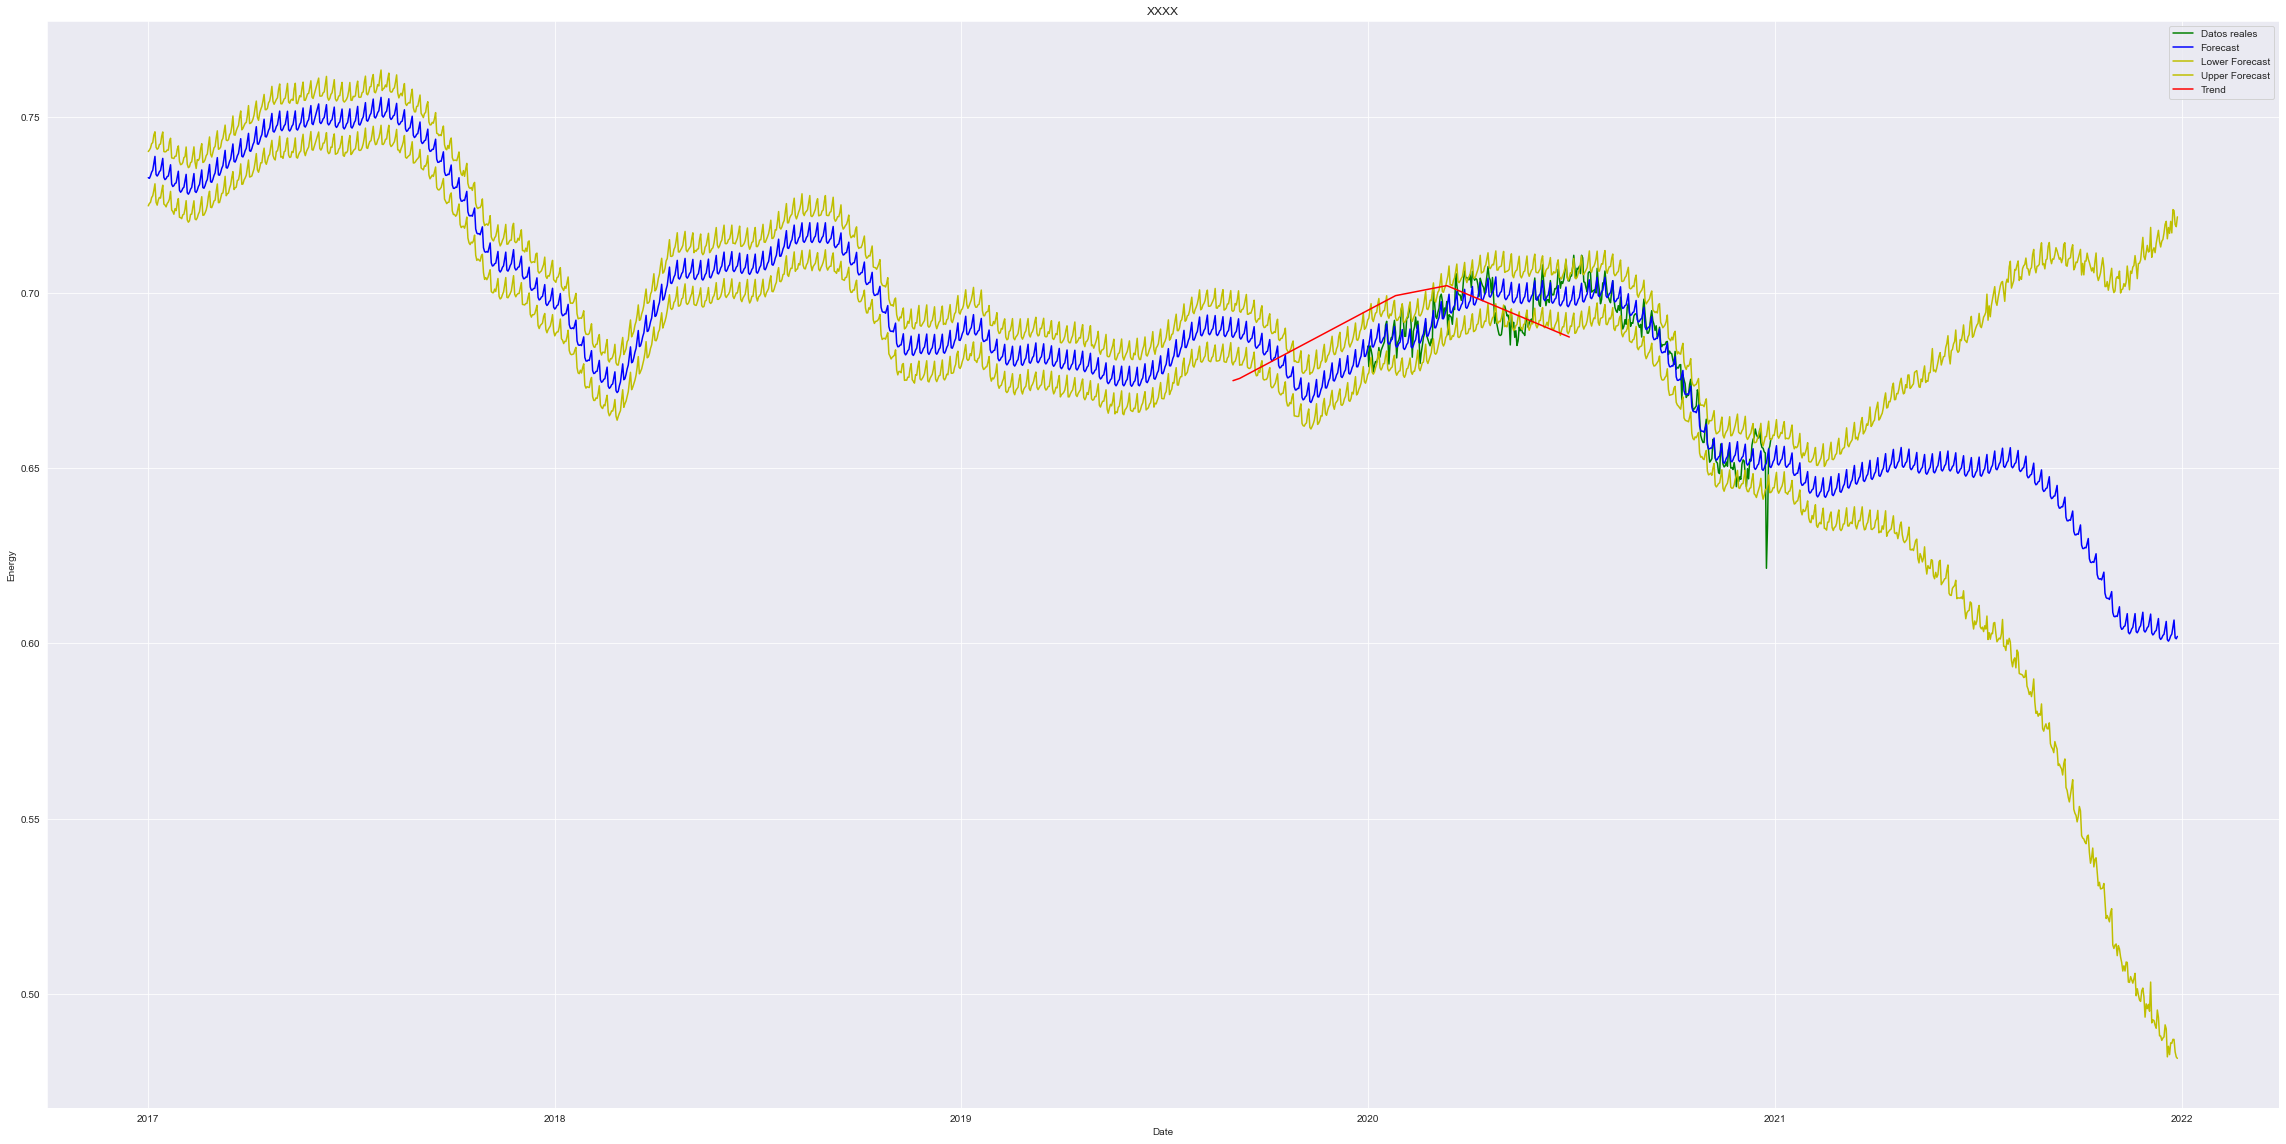

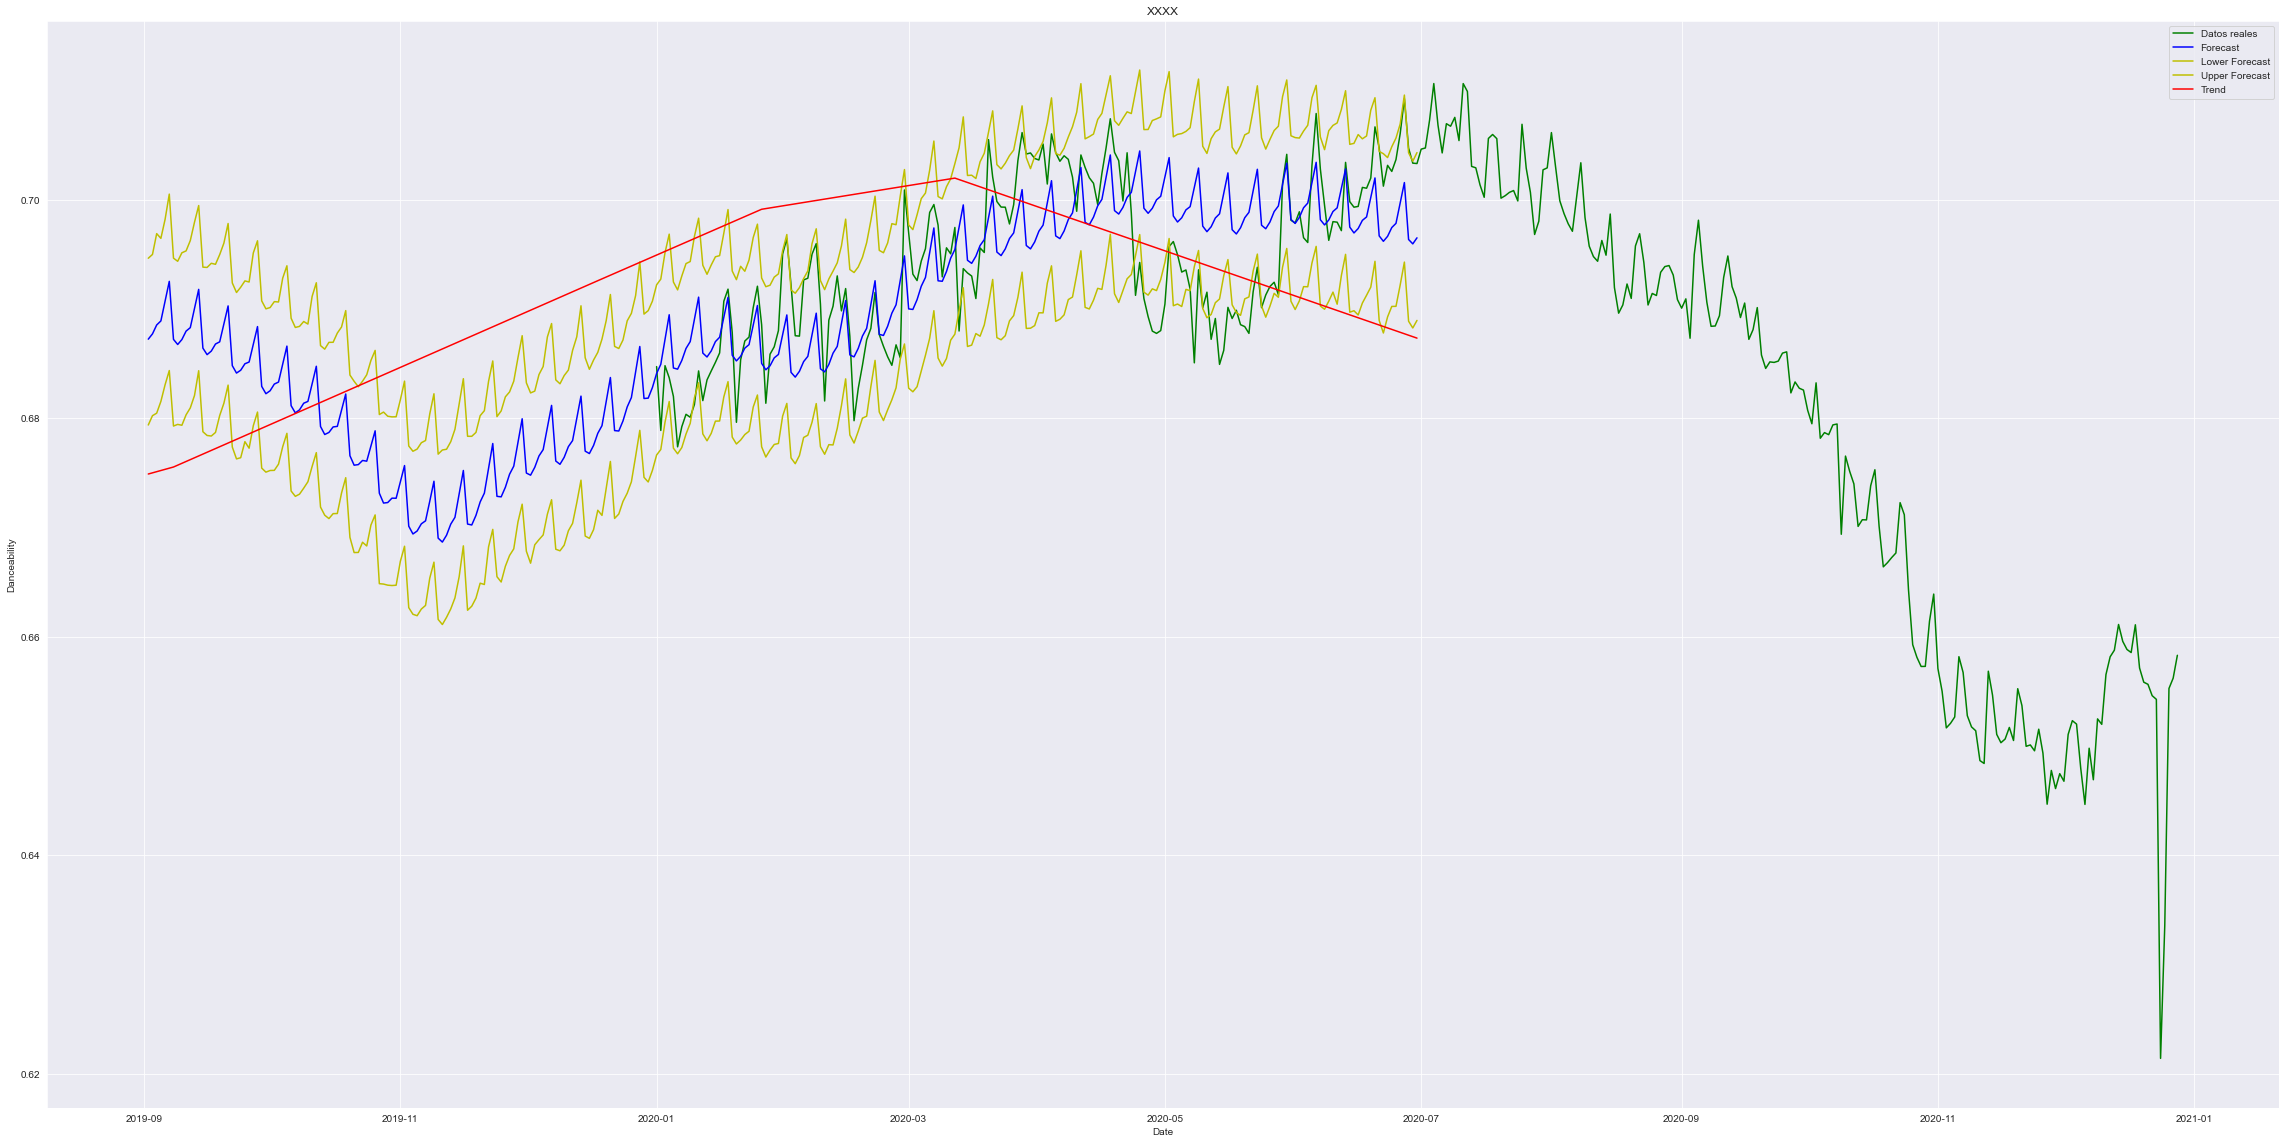

In [40]:
# Probamos con otra feature ENERGY

# Cogemos solo de las features que queremos
dfpro_energy = df_timeseries_prophet[df_timeseries_prophet['features'] == 'energy']
dfpro_energy_2020 = df_timeseries_prophet_2020[df_timeseries_prophet_2020['features'] == 'energy']


dfpro_energy = dfpro_energy.drop(columns=['Unnamed: 0', 'features']).rename(columns = {'feature_media_day': 'y', 'date': 'ds'}, inplace = False).reset_index()
dfpro_energy_2020 = dfpro_energy_2020.reset_index().drop(columns=['Unnamed: 0', 'features', 'index']).rename(columns = {'feature_media_day': 'y', 'date': 'ds'}, inplace = False)
dfpro_energy.dtypes

# Entrenamos modelo
m = Prophet()
m.fit(dfpro_energy)
# Hacemos las predicciones para el 2021
future = m.make_future_dataframe(periods=365)
future.tail()
# Hacemos el forecast completo
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

dfpro_energy_2020.set_index('ds', inplace=True)
dfpro_energy_2020.index = pd.to_datetime(dfpro_energy_2020.index)

forecast_pandemia = forecast[(forecast['ds'] > '2019-09-01') & (forecast['ds'] < '2020-07-01')]

plt.figure(figsize=(40, 20))
plt.plot(dfpro_energy_2020, 'g-')
plt.plot(forecast['ds'], forecast['yhat'], 'b-')
plt.plot(forecast['ds'], forecast['yhat_lower'], 'y-')
plt.plot(forecast['ds'], forecast['yhat_upper'], 'y-')
plt.plot(forecast_pandemia['ds'], forecast_pandemia['trend'], 'r-')
plt.legend(['Datos reales', 'Forecast', 'Lower Forecast', 'Upper Forecast', 'Trend'])
plt.xlabel('Date')
plt.ylabel('Energy')
plt.title('XXXX');
plt.show()


plt.figure(figsize=(40, 20))
plt.plot(dfpro_energy_2020, 'g-')
plt.plot(forecast_pandemia['ds'], forecast_pandemia['yhat'], 'b-')
plt.plot(forecast_pandemia['ds'], forecast_pandemia['yhat_lower'], 'y-')
plt.plot(forecast_pandemia['ds'], forecast_pandemia['yhat_upper'], 'y-')
plt.plot(forecast_pandemia['ds'], forecast_pandemia['trend'], 'r-')
plt.legend(['Datos reales', 'Forecast', 'Lower Forecast', 'Upper Forecast', 'Trend'])
plt.xlabel('Date')
plt.ylabel('Danceability')
plt.title('XXXX');
plt.show()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


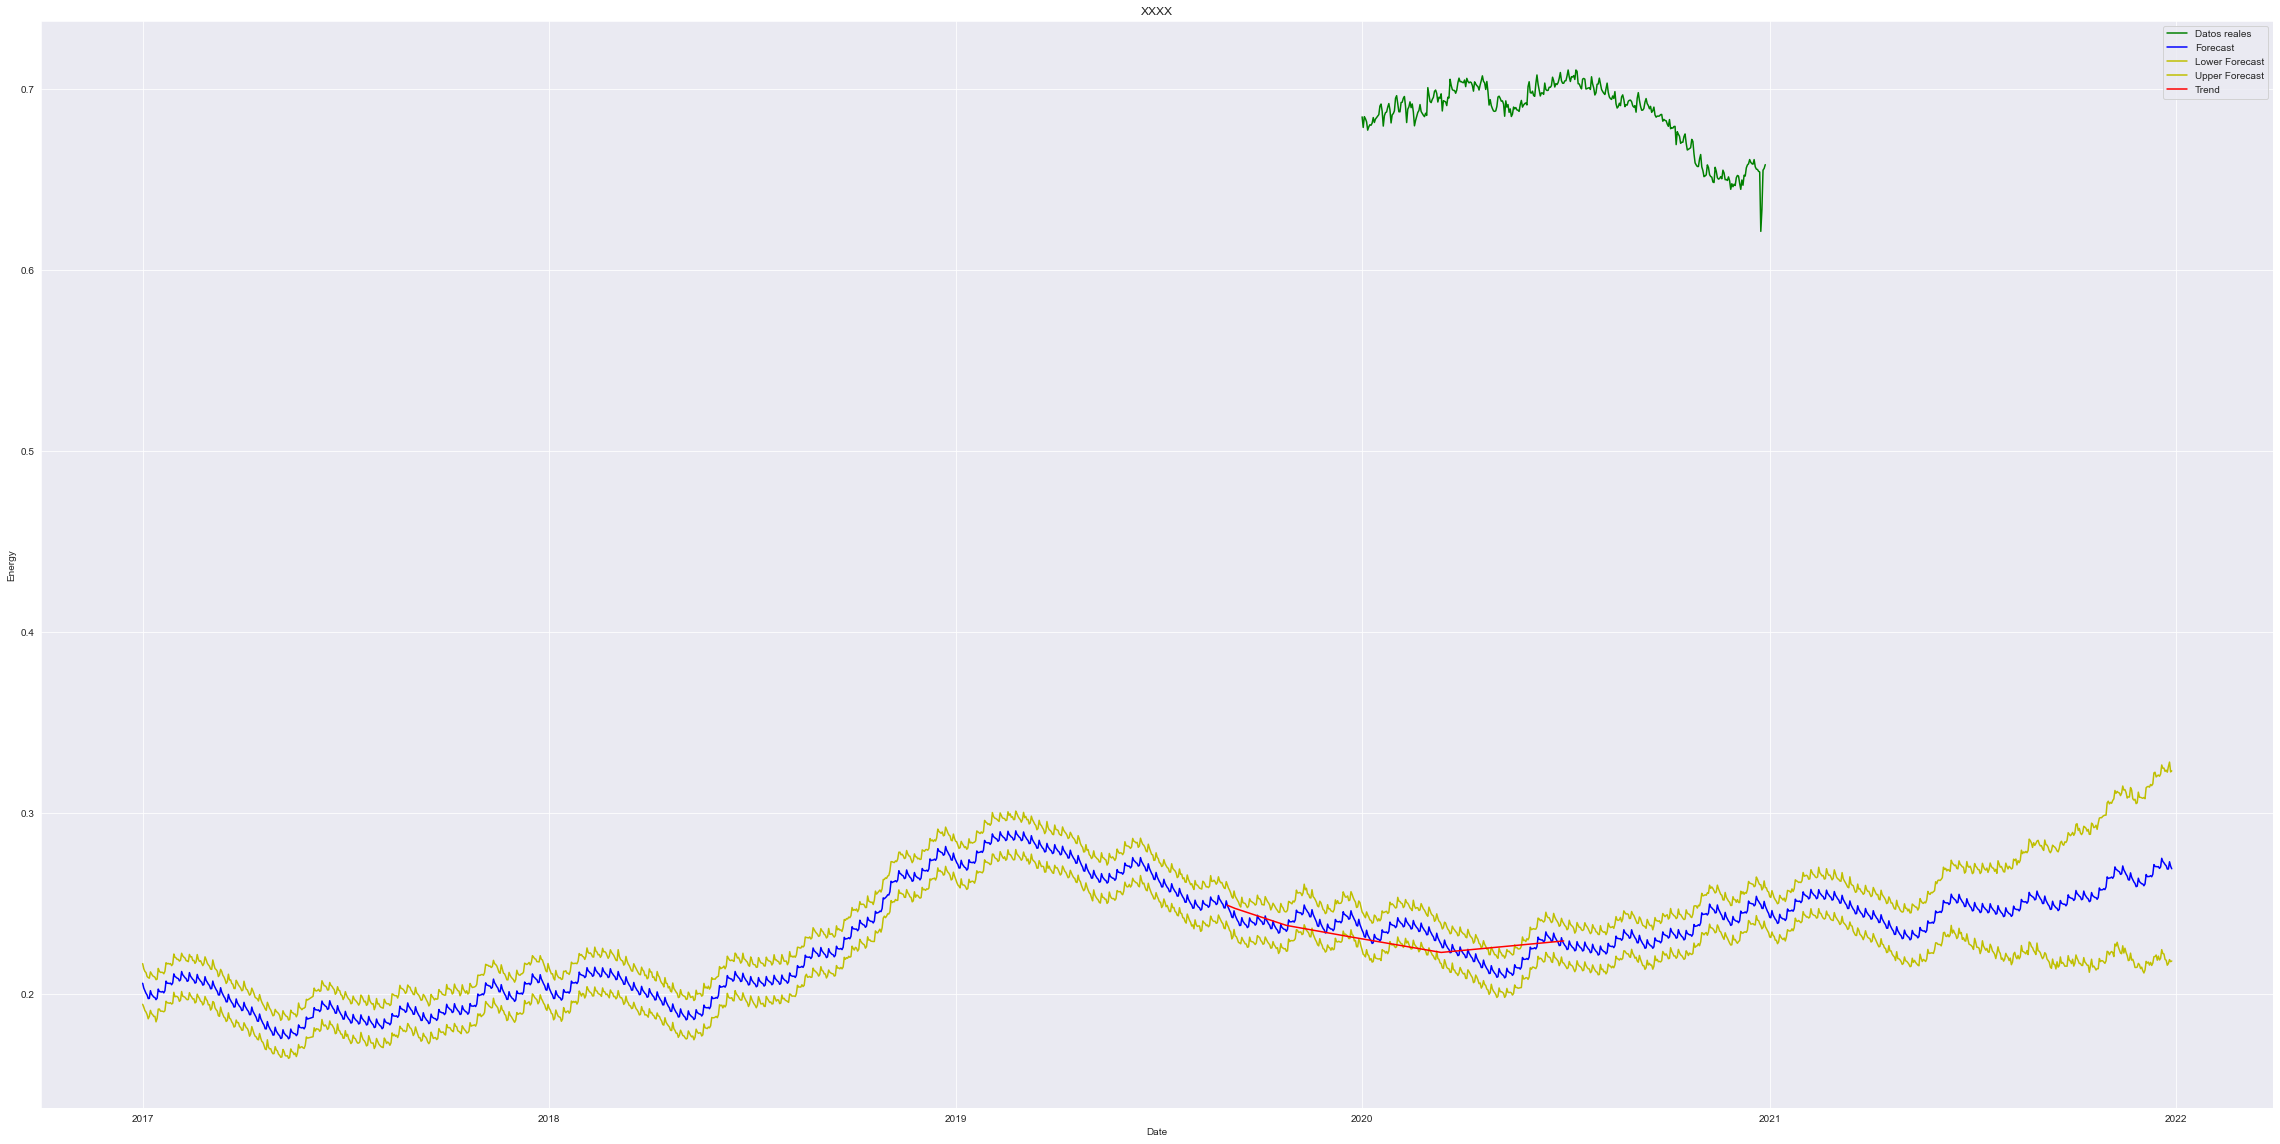

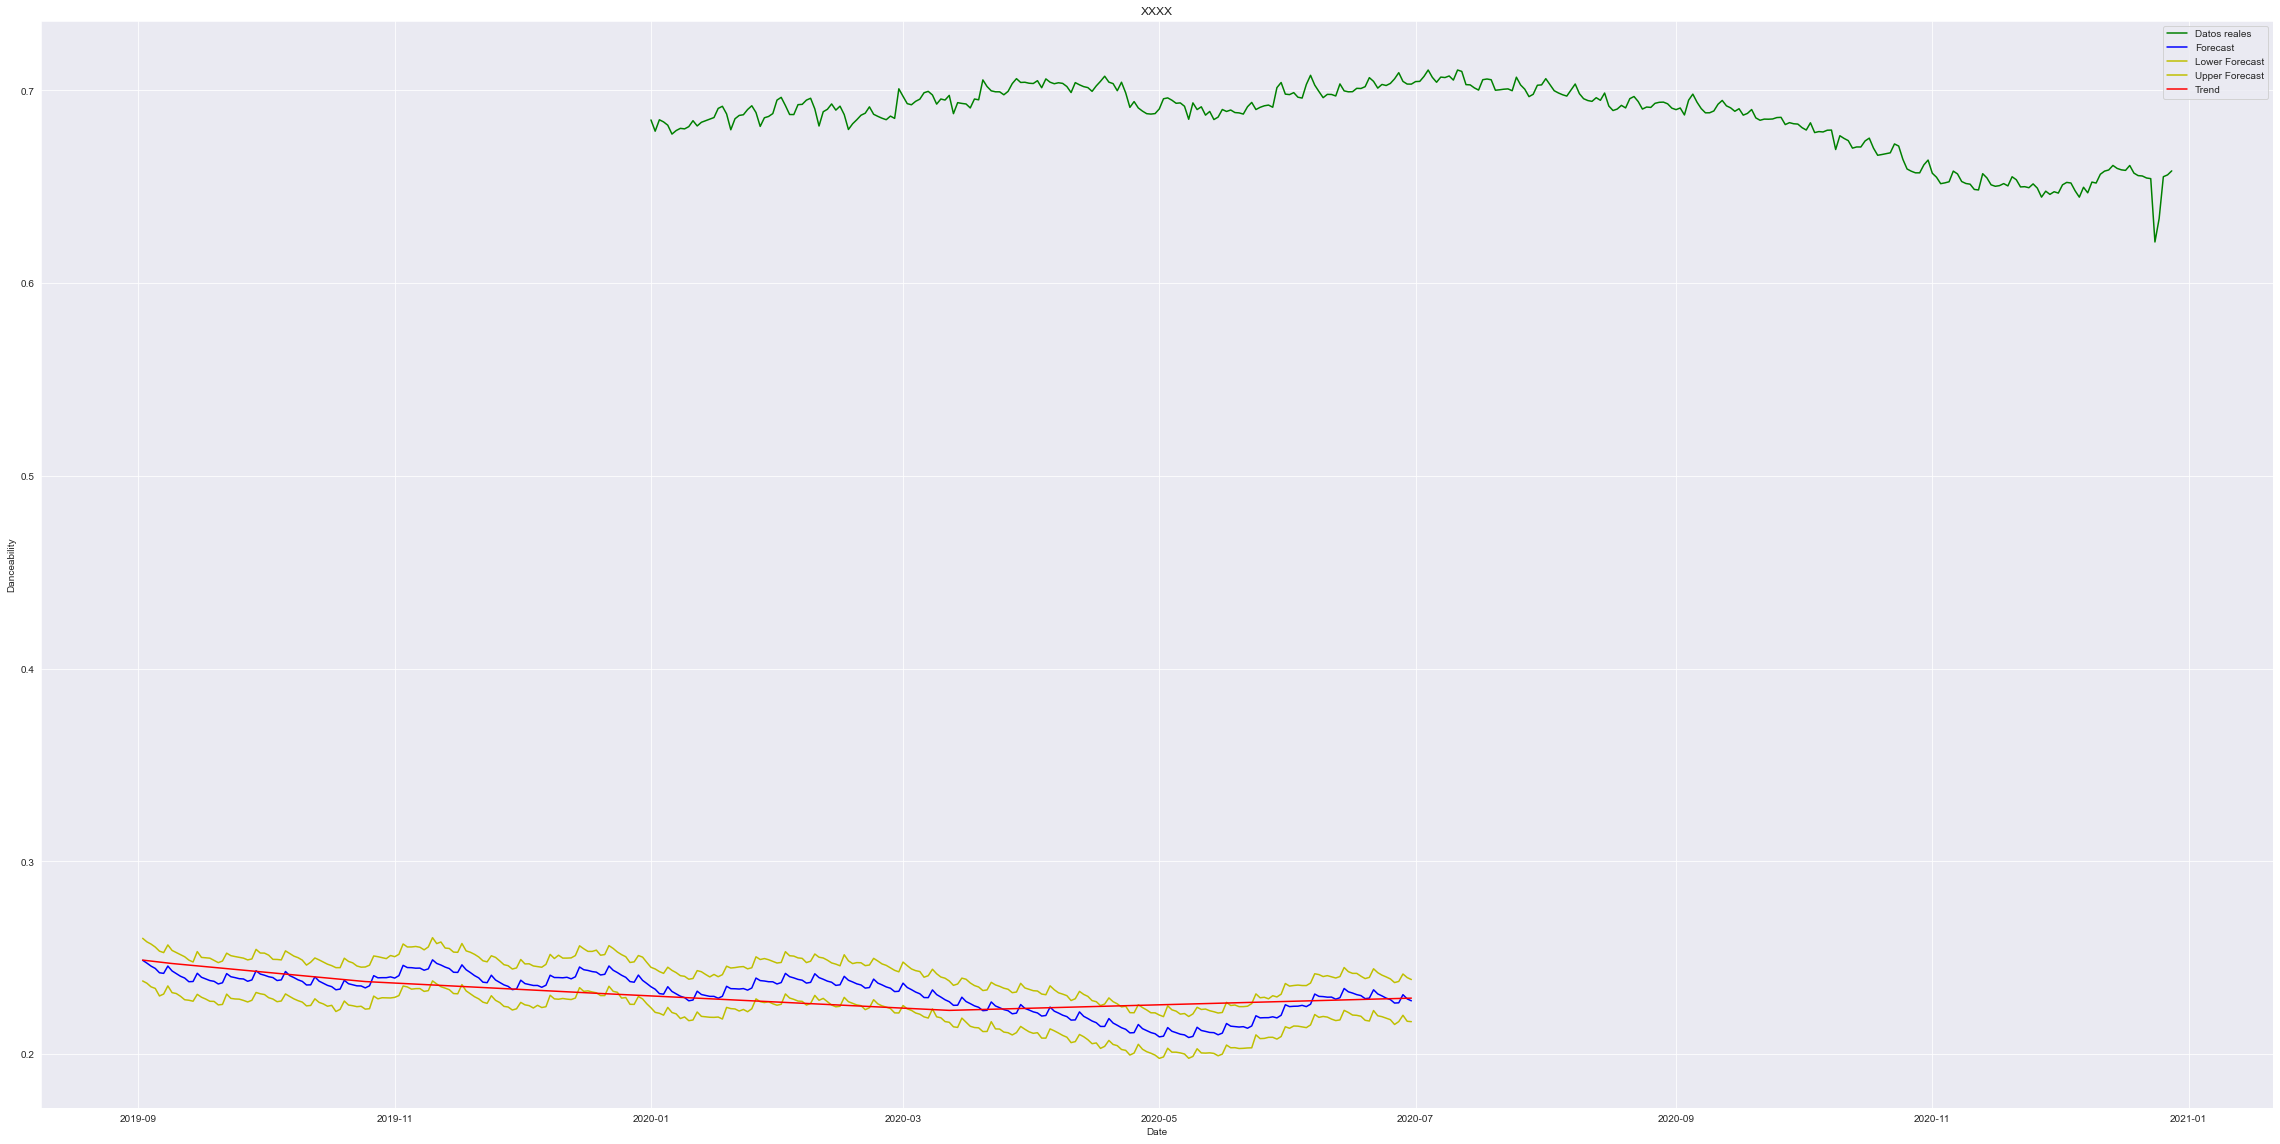

In [52]:
# Probamos con otra feature ACCOUSTINESS

# Cogemos solo de las features que queremos
dfpro_accous = df_timeseries_prophet[df_timeseries_prophet['features'] == 'acousticness']
dfpro_accous_2020 = df_timeseries_prophet_2020[df_timeseries_prophet_2020['features'] == 'acousticness']


dfpro_accous = dfpro_accous.drop(columns=['Unnamed: 0', 'features']).rename(columns = {'feature_media_day': 'y', 'date': 'ds'}, inplace = False).reset_index()
dfpro_accous_2020 = dfpro_accous_2020.reset_index().drop(columns=['Unnamed: 0', 'features', 'index']).rename(columns = {'feature_media_day': 'y', 'date': 'ds'}, inplace = False)
dfpro_accous.dtypes

# Entrenamos modelo
m = Prophet()
m.fit(dfpro_accous)
# Hacemos las predicciones para el 2021
future = m.make_future_dataframe(periods=365)
future.tail()
# Hacemos el forecast completo
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

dfpro_accous_2020.set_index('ds', inplace=True)
dfpro_accous_2020.index = pd.to_datetime(dfpro_accous_2020.index)

forecast_pandemia = forecast[(forecast['ds'] > '2019-09-01') & (forecast['ds'] < '2020-07-01')]

plt.figure(figsize=(40, 20))
plt.plot(dfpro_energy_2020, 'g-')
plt.plot(forecast['ds'], forecast['yhat'], 'b-')
plt.plot(forecast['ds'], forecast['yhat_lower'], 'y-')
plt.plot(forecast['ds'], forecast['yhat_upper'], 'y-')
plt.plot(forecast_pandemia['ds'], forecast_pandemia['trend'], 'r-')
plt.legend(['Datos reales', 'Forecast', 'Lower Forecast', 'Upper Forecast', 'Trend'])
plt.xlabel('Date')
plt.ylabel('Energy')
plt.title('XXXX');
plt.show()


plt.figure(figsize=(40, 20))
plt.plot(dfpro_energy_2020, 'g-')
plt.plot(forecast_pandemia['ds'], forecast_pandemia['yhat'], 'b-')
plt.plot(forecast_pandemia['ds'], forecast_pandemia['yhat_lower'], 'y-')
plt.plot(forecast_pandemia['ds'], forecast_pandemia['yhat_upper'], 'y-')
plt.plot(forecast_pandemia['ds'], forecast_pandemia['trend'], 'r-')
plt.legend(['Datos reales', 'Forecast', 'Lower Forecast', 'Upper Forecast', 'Trend'])
plt.xlabel('Date')
plt.ylabel('Danceability')
plt.title('XXXX');
plt.show()

## Por mes

In [18]:
df_timeseries_prophet_month = pd.read_csv("data_allyear/data_ana_timeseries_final_toprophet_BYMONTH.csv", sep = ',', parse_dates=['year_month'])
print('Tamaño inicial: ', df_timeseries_prophet_month.shape)
df_timeseries_prophet_month_2020 = df_timeseries_prophet_month[(df_timeseries_prophet_month['year_month'].dt.year == 2020)]
df_timeseries_prophet_month_2020

Tamaño inicial:  (528, 4)


,Unnamed: 0,year_month,feature_media_month,features
36,36,2020-01-01,0.377326,length
37,37,2020-02-01,0.375641,length
38,38,2020-03-01,0.367625,length
39,39,2020-04-01,0.369793,length
40,40,2020-05-01,0.371047,length
...,...,...,...,...
523,43,2020-08-01,0.573212,tempo
524,44,2020-09-01,0.586658,tempo
525,45,2020-10-01,0.570874,tempo
526,46,2020-11-01,0.570003,tempo


In [19]:
# Cargamos archivo
df_timeseries_prophet_month = pd.read_csv("data_allyear/data_ana_timeseries_final_toprophet_BYMONTH.csv", sep = ',', parse_dates=['year_month'])
print('Tamaño inicial: ', df_timeseries_prophet_month.shape)
df_timeseries_prophet_month_2020 = pd.read_csv("data_allyear/data_ana_timeseries_final_toprophet_BYMONTH.csv", sep = ',', parse_dates=['year_month'])
print('Tamaño inicial: ', df_timeseries_prophet_month_2020.shape)

# Quitamos el 2020, porque es lo que queremos que prediga
df_timeseries_prophet_month = df_timeseries_prophet_month[(df_timeseries_prophet_month['year_month'].dt.year != 2020)]
df_timeseries_prophet_month_2020 = df_timeseries_prophet_month_2020[(df_timeseries_prophet_month_2020['year_month'].dt.year == 2020)]

# Cogemos solo de las features que queremos
dfpro_danceability = df_timeseries_prophet_month[df_timeseries_prophet_month['features'] == 'danceability']
dfpro_danceability_2020 = df_timeseries_prophet_month_2020[df_timeseries_prophet_month_2020['features'] == 'danceability']

# Preparamos
dfpro_danceability = dfpro_danceability.reset_index().drop(columns=['Unnamed: 0','features', 'index']).rename(columns = {
    'feature_media_month': 'y', 'year_month': 'ds'}, inplace = False)
dfpro_danceability_2020 = dfpro_danceability_2020.reset_index().drop(columns=['Unnamed: 0','features', 'index']).rename(columns = {
    'feature_media_month': 'y', 'year_month': 'ds'}, inplace = False)
print(dfpro_danceability.dtypes)
print(dfpro_danceability_2020.dtypes)
dfpro_danceability_2020

Tamaño inicial:  (528, 4)
Tamaño inicial:  (528, 4)
ds    datetime64[ns]
y            float64
dtype: object
ds    datetime64[ns]
y            float64
dtype: object


,ds,y
0,2020-01-01,0.729841
1,2020-02-01,0.736067
2,2020-03-01,0.738858
3,2020-04-01,0.736961
4,2020-05-01,0.742680
5,2020-06-01,0.744054
6,2020-07-01,0.739802
7,2020-08-01,0.733600
8,2020-09-01,0.723533
9,2020-10-01,0.712662


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


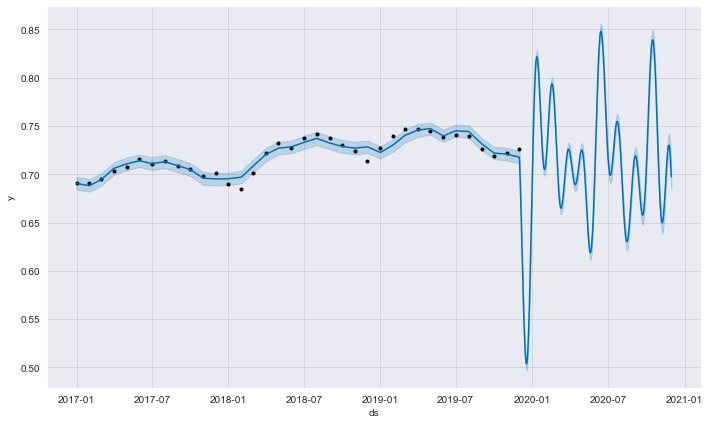

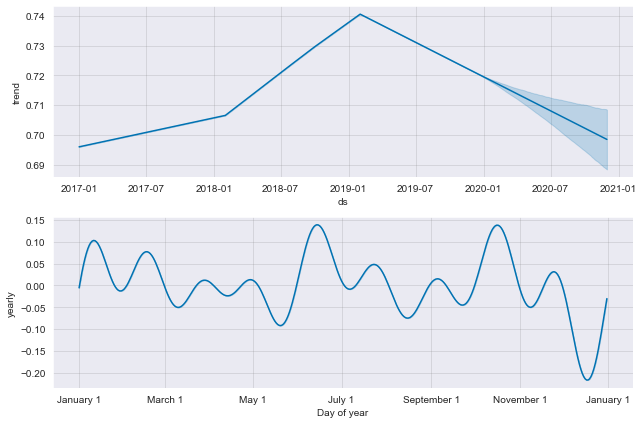

In [20]:
# Probamos el Prophet forecasting
from fbprophet import Prophet

# Entrenamos modelo
m = Prophet()
m.fit(dfpro_danceability)

# Hacemos las predicciones para el 2021
future = m.make_future_dataframe(periods=365)
future.tail()

# Hacemos el forecast completo
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

# Ploteamos 
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)

In [54]:
# dfpro_danceability_2020.set_index('ds', inplace=True)
# dfpro_danceability_2020.index = pd.to_datetime(dfpro_danceability_2020.index)

plt.figure(figsize=(30, 15))
plt.plot(forecast['ds'], forecast['yhat'], 'b-')
plt.plot(forecast['ds'], forecast['yhat_lower'], 'y-')
plt.plot(forecast['ds'], forecast['yhat_upper'], 'y-')
plt.plot(dfpro_danceability_2020, 'g-')
plt.show()

ValueError: view limit minimum -36907.6 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 2160x1080 with 1 Axes>

## Hacemos función para calcular los forecasting de todas las features

In [22]:
from fbprophet import Prophet

# Cargamos archivo
df_timeseries_prophet = pd.read_csv("data_allyear/data_ana_timeseries_final_toprophet_BYDAY.csv", sep = ',', parse_dates=['date'])
print('Tamaño inicial: ', df_timeseries_prophet.shape)

# Quitamos el 2020, porque es lo que queremos que prediga
df_timeseries_prophet_no2020 = df_timeseries_prophet[(df_timeseries_prophet['date'].dt.year != 2020)]
df_timeseries_prophet_2020 = df_timeseries_prophet[(df_timeseries_prophet['date'].dt.year == 2020)]

# Funcion para sacar las tablas y exportarlas
def forecasting_features (feature):
    #Extraemos
    dfpro_no2020 = df_timeseries_prophet_no2020[df_timeseries_prophet_no2020['features'] == feature]
    dfpro_2020 = df_timeseries_prophet_2020[df_timeseries_prophet_2020['features'] == feature]
    dfpro_all = df_timeseries_prophet[df_timeseries_prophet['features'] == feature]
    # Preparamos
    dfpro_no2020 = dfpro_no2020.drop(columns=['Unnamed: 0', 'features']).rename(columns = {'feature_media_day': 'y', 'date': 'ds'}, inplace = False).reset_index()
    dfpro_2020 = dfpro_2020.reset_index().drop(columns=['Unnamed: 0', 'features', 'index']).rename(columns = {'feature_media_day': 'y', 'date': 'ds'}, inplace = False)
    dfpro_all = dfpro_all.reset_index().drop(columns=['Unnamed: 0', 'features', 'index']).rename(columns = {'feature_media_day': 'y', 'date': 'ds'}, inplace = False)
    # FORECASTING
    # Para cambiar inertavlo de confianza: forecast = Prophet(interval_width=0.95).fit(dfpro_no2020).predict(future)
    m = Prophet()
    m.fit(dfpro_no2020)
    # Hacemos las predicciones para el 2020
    future = m.make_future_dataframe(periods=365)
    # Hacemos el forecast completo
    forecast = m.predict(future)
    # Preparamos la exportación
    forecast_graphic = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend']]
    forecast_graphic.drop(forecast_graphic.tail(2).index,inplace=True)
    # Meter Datos reales en tabla forecast
    forecast_graphic_final = pd.merge(left=forecast_graphic, left_on='ds',
                                   right=dfpro_all,right_on='ds').rename(columns={'ds':'Fecha',
                                                                                                'yhat':'Predicción',
                                                                                                'yhat_lower':'Predicción Lower',
                                                                                                'yhat_upper':'Predicción Upper',
                                                                                                'trend': 'Tendencia',
                                                                                                'y':'Datos reales'})
    # Hacemos gráfico de detalle también
    forecast_graphic_confin = forecast_graphic_final[(forecast_graphic_final['Fecha'] > '2020-01-01') & (forecast_graphic_final['Fecha'] < '2020-07-01')]
    # Exportamos
    forecast_graphic_final.to_csv("graphs_article/graph_features_forecasting_{}.csv".format(feature), sep = ',')
    forecast_graphic_confin.to_csv("graphs_article/graph_features_forecasting_{}_confin.csv".format(feature), sep = ',')
    # Ploteamos
    # m.plot(forecast)
    # m.plot_components(forecast)
    # return forecast_graphic1_daily_final

forecasting_features('danceability')

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Tamaño inicial:  (15994, 4)


NameError: name 'forecast_graphic1' is not defined

In [ ]:
# Para sacar todas
features_toforecast = ['length', 'popularity', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness','speechiness','valence','tempo']
for n in features_toforecast:
    forecasting_features (n)